In [1]:
from skimage import io, feature, measure, transform
from matplotlib import pyplot as plt
import cv2
import numpy as np
%matplotlib inline

In [2]:
img1 = io.imread('./demo1.png')
img2 = io.imread('./demo2.png')

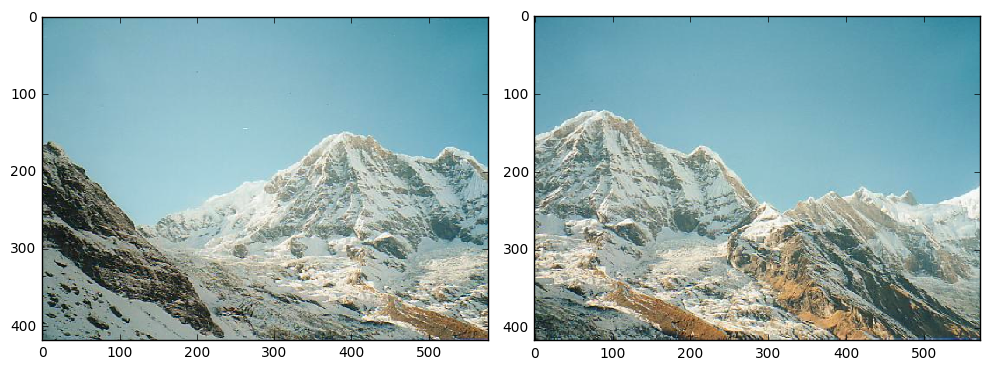

In [3]:
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
io.imshow(img1)
plt.subplot(1, 2, 2)
io.imshow(img2)

In [4]:
img1_gray = cv2.cvtColor(img1, cv2.COLOR_RGB2GRAY)
img2_gray = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)

In [6]:
# sift= cv2.xfeatures2d.SIFT_create()
sift = cv2.BRISK()

In [7]:
kps1, descs1 = sift.detectAndCompute(img1_gray, None)
kps2, descs2 = sift.detectAndCompute(img2_gray, None)

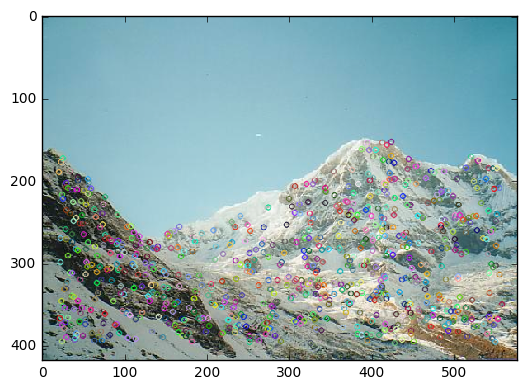

In [8]:
io.imshow(cv2.drawKeypoints(img1, kps1, None))

In [9]:
matches = feature.match_descriptors(descs1, descs2, cross_check=True)

In [10]:
kps1 = np.stack(np.vectorize(lambda kp: (kp.pt[1], kp.pt[0]))(np.array(kps1)), axis=1)
kps2 = np.stack(np.vectorize(lambda kp: (kp.pt[1], kp.pt[0]))(np.array(kps2)), axis=1)

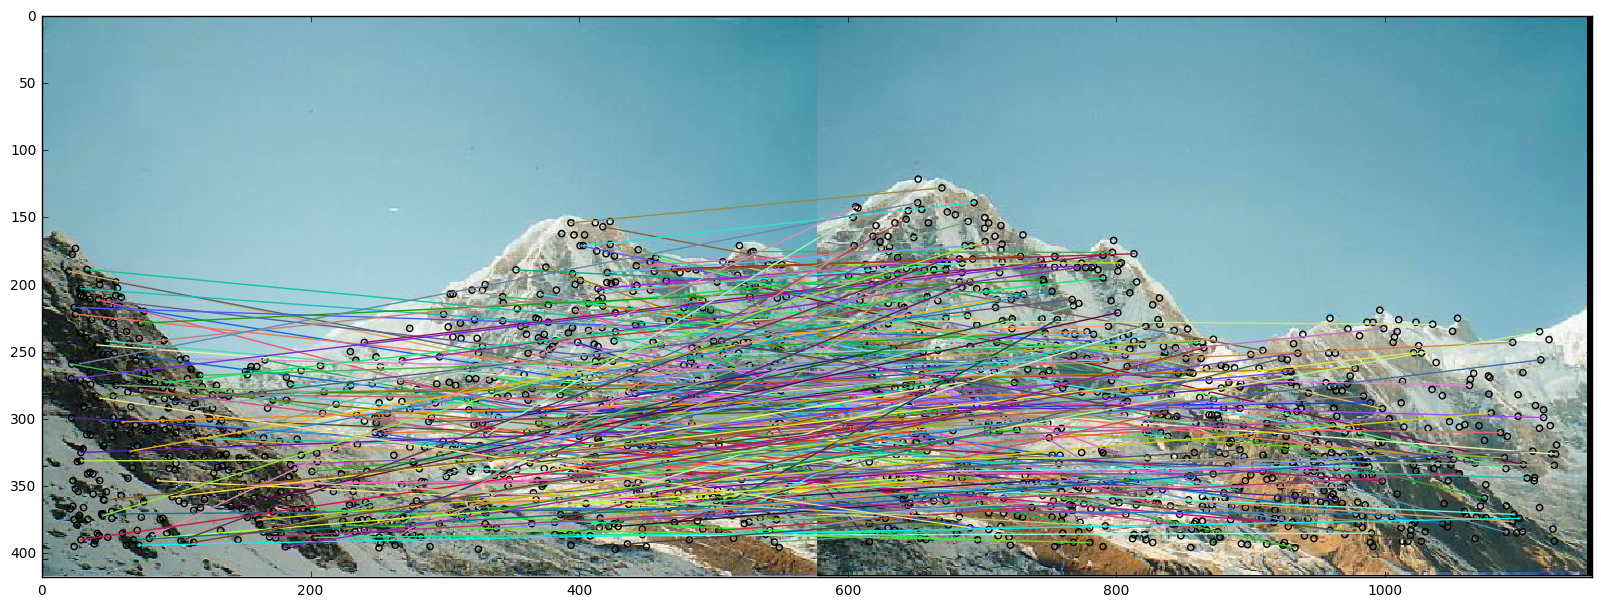

In [11]:
plt.figure(figsize=(20, 10))
feature.plot_matches(plt.axes(), img1, img2, kps1, kps2, matches)

In [12]:
transformation, match_mask = measure.ransac([kps2[:,::-1][matches[:, 1]], kps1[:,::-1][matches[:, 0]]],
                                            transform.ProjectiveTransform, min_samples=4, residual_threshold=5)

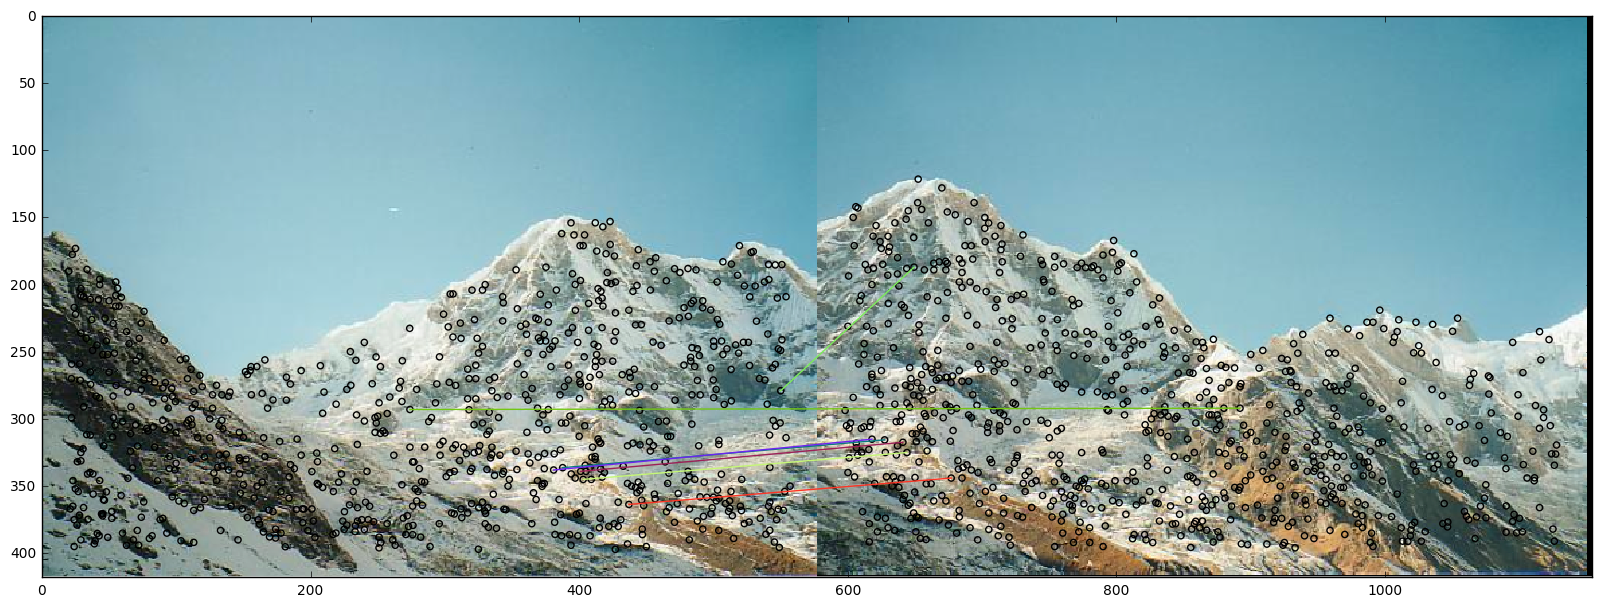

In [13]:
plt.figure(figsize=(20, 10))
feature.plot_matches(plt.axes(), img1, img2, kps1, kps2, matches[match_mask])

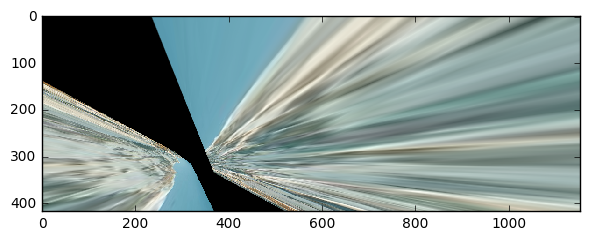

In [14]:
io.imshow(transform.warp(img2, inverse_map=transformation.inverse, output_shape=(img1.shape[0], img1.shape[1] * 2)))

In [14]:
panoram = transform.warp(img2, inverse_map=transformation.inverse, output_shape=(img1.shape[0], img1.shape[1] * 2))
panoram[:img1.shape[0], :img1.shape[1]] = img1 / 255

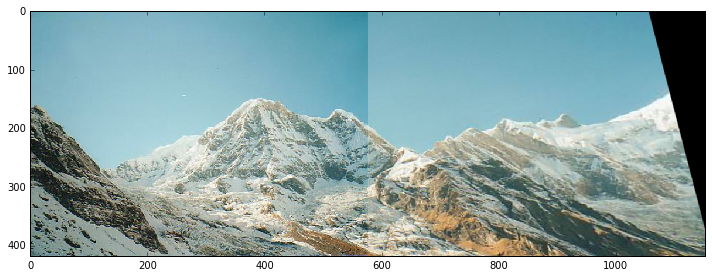

In [15]:
plt.figure(figsize=(10, 8))
io.imshow(panoram)